In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn
import seaborn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/PreProcessed/MixWine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_name
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### corelation matrix to find correlation between features

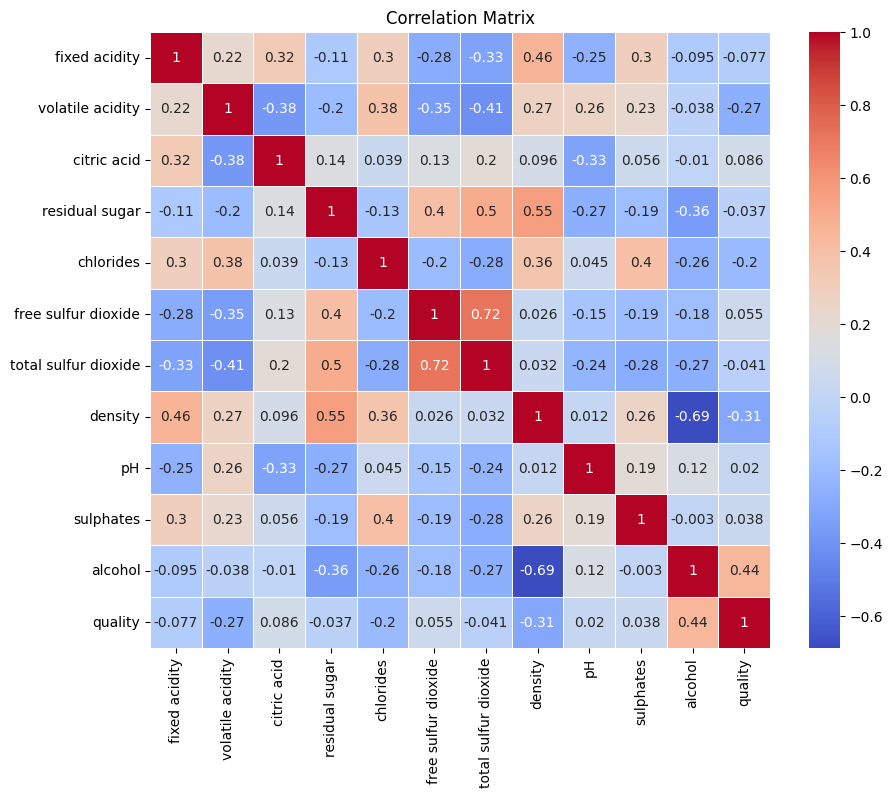

In [3]:
df_ = df.select_dtypes(include=['number'])
corr_matrix = df_.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### *We observe joinplots to select features where we could try to extract different cluster that would help us predict the quality of a wine*

<Figure size 1000x800 with 0 Axes>

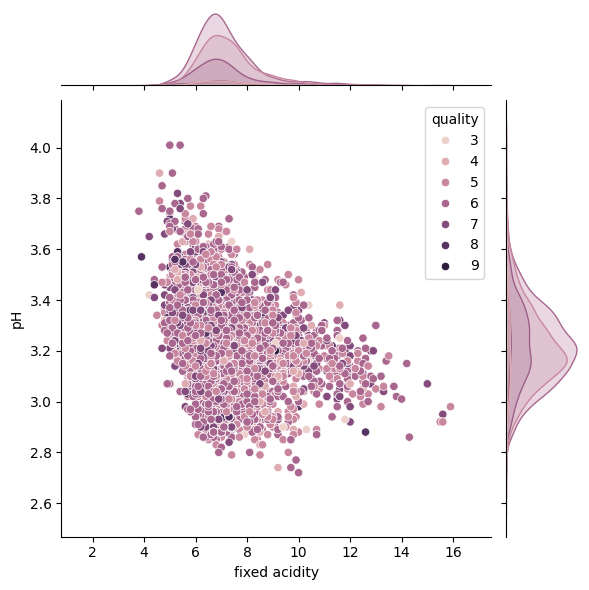

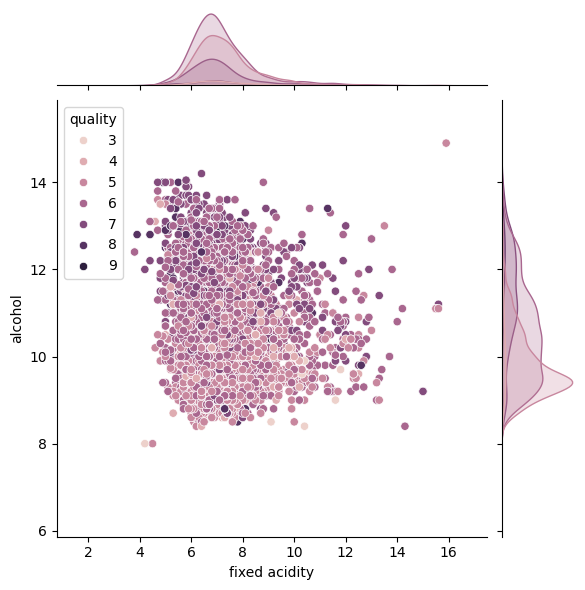

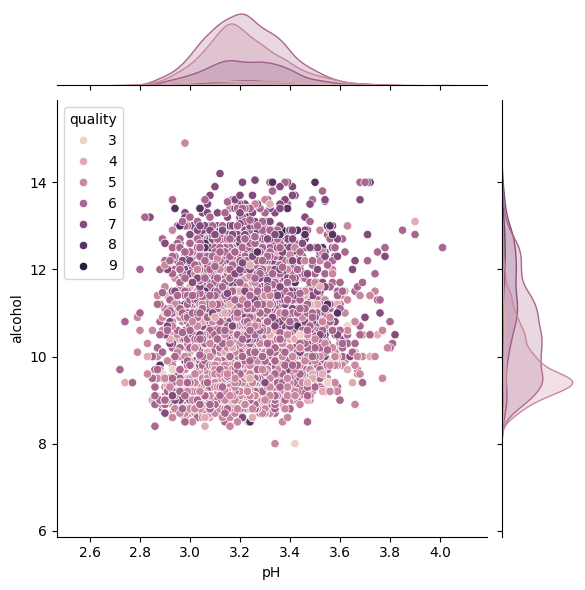

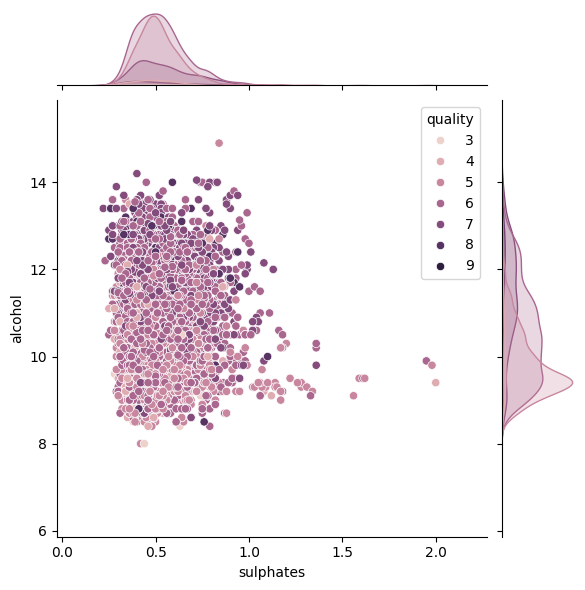

In [4]:
plt.figure(figsize=(10,8))
sns.jointplot(x='fixed acidity',y="pH", data = df, hue = 'quality')
sns.jointplot(x='fixed acidity',y="alcohol", data = df, hue = 'quality') 
sns.jointplot(x='pH',y="alcohol", data = df, hue = 'quality')
sns.jointplot(x='sulphates',y="alcohol", data = df, hue = 'quality')
plt.show()

##### A jointplot is like a pairplot, plotting data according to 2 different features but adds the distributions of a third features (the target or discrete/ordinal/nominal value)

### EM algo
##### *EM search for gaussian mixture. It will model our data set like n_cluster distributed each like a normal distribution with specific parameters. It will maximize the likelihood by updating the means and the standard deviation of each cluster. It has two steps like the k-means. It returns means and sds. It returns labels such as a hard clustering but can also return probability like a soft clustering*

In [5]:
from math import exp, log, sqrt, pi 
from numpy.linalg import inv
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

In [6]:
df_em = df[['fixed acidity', 'alcohol', 'pH']]
n_cluster = 7 #number of clusters 
gmm = GaussianMixture(n_components=n_cluster, tol = 1e-5, max_iter = 200, init_params='kmeans').fit(df_em)
probs = gmm.predict_proba(df_em) #soft clustering
labels = gmm.predict(df_em) #hardclustering
labels+=3 #to have the clusters labels with the same number than quality
print(gmm.means_)

[[ 7.44099259 10.90786347  3.11381298]
 [ 6.74972142  9.21816325  3.11631901]
 [ 6.90918224 12.40579959  3.1733522 ]
 [ 7.70985899  9.47998005  3.23087076]
 [ 9.3556057  10.83455946  3.24714649]
 [ 6.83823857 10.45838584  3.28021605]
 [ 6.12304464 11.36299381  3.33879753]]


#### Here, we observe the means of each cluster. Fixed acidity, alcohol, pH

In [7]:
counts_quality = df['quality'].value_counts().sort_index()
counts_quality

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

In [8]:
counts_labels = np.bincount(labels)
counts_labels

array([   0,    0,    0,  320, 1355,  915,  873,  532, 2180,  322])

In [9]:
count_6 = np.count_nonzero(labels == 6)
count_6

873

In [10]:
np.min(labels)

3

/var/folders/sg/0mhq7n352514_w3l2tm5gt0m0000gn/T/ipykernel_35871/480118553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_em['labels'] = labels


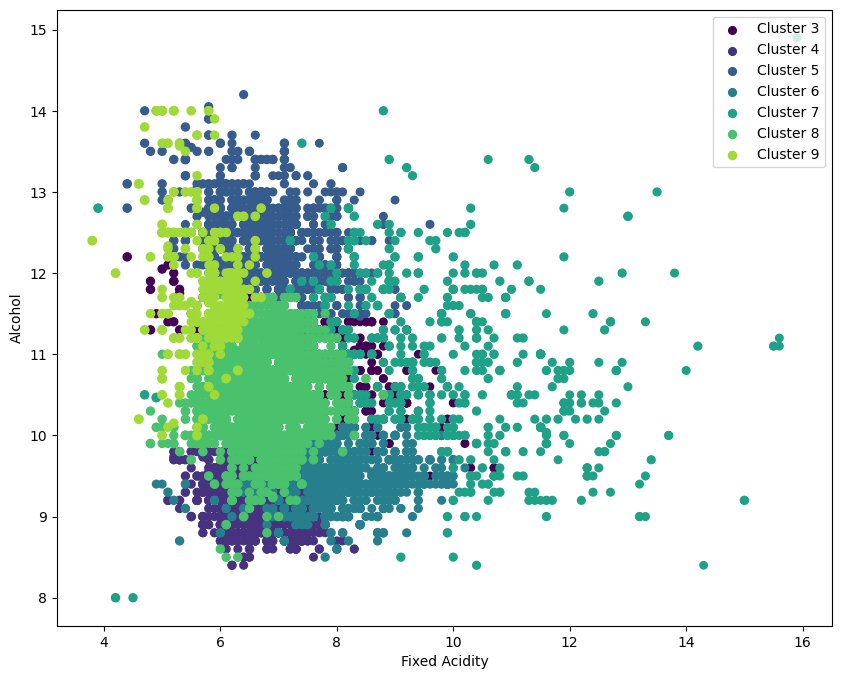

In [11]:
df_em['labels'] = labels
plt.figure(figsize=(10,8))
cmap = plt.get_cmap('viridis')
colors = [cmap(i / n_cluster) for i in range(n_cluster)]

for label, color in zip(np.unique(labels), colors):
    df_pts = df_em[df_em['labels'] == label]
    plt.scatter(df_pts['fixed acidity'], df_pts['alcohol'], label=f'Cluster {label}', color=color, s=df_pts['pH'] *10)

# Ajoutez des étiquettes et une légende au graphique.
plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.legend()

# Affichez le graphique.
plt.show()

#### This plot shows the result of the hard clustering with EM

In [12]:
cluster_3 = df[df_em['labels'] == 3]
cluster_4 = df[df_em['labels'] == 4]
cluster_5 = df[df_em['labels'] == 5]
cluster_6 = df[df_em['labels'] == 6]
cluster_7 = df[df_em['labels'] == 7]
cluster_8 = df[df_em['labels'] == 8]
cluster_9 = df[df_em['labels'] == 9]

In [13]:
#print(cluster_3['quality'].value_counts().sort_index())
for c in range(3, 10):
    cluster_data = df[df_em['labels'] == c]
    value_counts = cluster_data['quality'].value_counts().sort_index()
    print(f"Cluster {c}:")
    print(value_counts)
    print("\n")


Cluster 3:
quality
3      4
4     22
5     91
6    146
7     49
8      8
Name: count, dtype: int64


Cluster 4:
quality
3      2
4     40
5    734
6    486
7     78
8     15
Name: count, dtype: int64


Cluster 5:
quality
3      2
4     12
5     53
6    411
7    342
8     91
9      4
Name: count, dtype: int64


Cluster 6:
quality
3      2
4     41
5    488
6    304
7     35
8      3
Name: count, dtype: int64


Cluster 7:
quality
3      7
4     14
5    120
6    249
7    129
8     12
9      1
Name: count, dtype: int64


Cluster 8:
quality
3      12
4      74
5     608
6    1091
7     348
8      47
Name: count, dtype: int64


Cluster 9:
quality
3      1
4     13
5     44
6    149
7     98
8     17
Name: count, dtype: int64




In [14]:
for c in range(3, 10):
    cluster_data = df[df_em['labels'] == c]
    print(f"Cluster {c}:")
    print(cluster_data.describe())
    print("\n")

Cluster 3:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count     320.000000        320.000000   320.000000      320.000000   
mean        8.008125          0.276219     0.361750        4.204219   
std         1.090137          0.115685     0.108801        3.803287   
min         4.400000          0.100000     0.080000        0.600000   
25%         7.600000          0.200000     0.290000        1.300000   
50%         8.100000          0.250000     0.340000        2.000000   
75%         8.600000          0.300000     0.432500        7.000000   
max        10.700000          1.005000     1.000000       15.600000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  320.000000           320.000000            320.000000  320.000000   
mean     0.043312            28.768750            118.182812    0.993285   
std      0.035723            16.704033             46.397342    0.002123   
min      0.015000             3.000000       

### *Conclusion :* 

##### Even with features that seemed to sparse the dataset according to quality, the EM algorithm isn't efficient for clustering data and predict quality. The mean quality of the clusters is from 5.2 to 6.5. Multiple factor for this result : 
> There is something of a gaussian mixture with the 3 features we used. However the mean is almost the same for each quality mixture (see the joinplots with pH/fixed acidity / alcohol). 
> The alcohol feature seemed to be able to separate quality clusters as gaussian distributions : the problem is that the distribution are also overlapping
> Also alcohol ahad the greatest correlation coefficient with quality but the distributions of qualities according to alcohol and either fixed acidity or pH (see the joinplots) are not normal distribution.

Finally, the Expectation-Maximization (EM) algorithm is not well-suited for this dataset due to the fact that the quality exhibits either a nearly identical normal distribution with respect to certain features or a non-normally distributed pattern in relation to other features